In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
from load_functions import *

In [24]:
users_df = load_users()
orgs_df = load_orgs()

,average_bill,rating,rubrics_l,features_l
count,66405.000000,53257.000000,66405.000000,66405.000000
mean,387.796100,4.126775,1.452361,5.809035
std,607.360488,0.699122,0.668355,5.367545
min,-1.000000,0.000000,1.000000,0.000000
25%,-1.000000,3.868421,1.000000,1.000000
50%,-1.000000,4.255814,1.000000,5.000000
75%,500.000000,4.556474,2.000000,9.000000
max,10000.000000,5.000000,6.000000,33.000000


<AxesSubplot:xlabel='features_l', ylabel='Percent'>

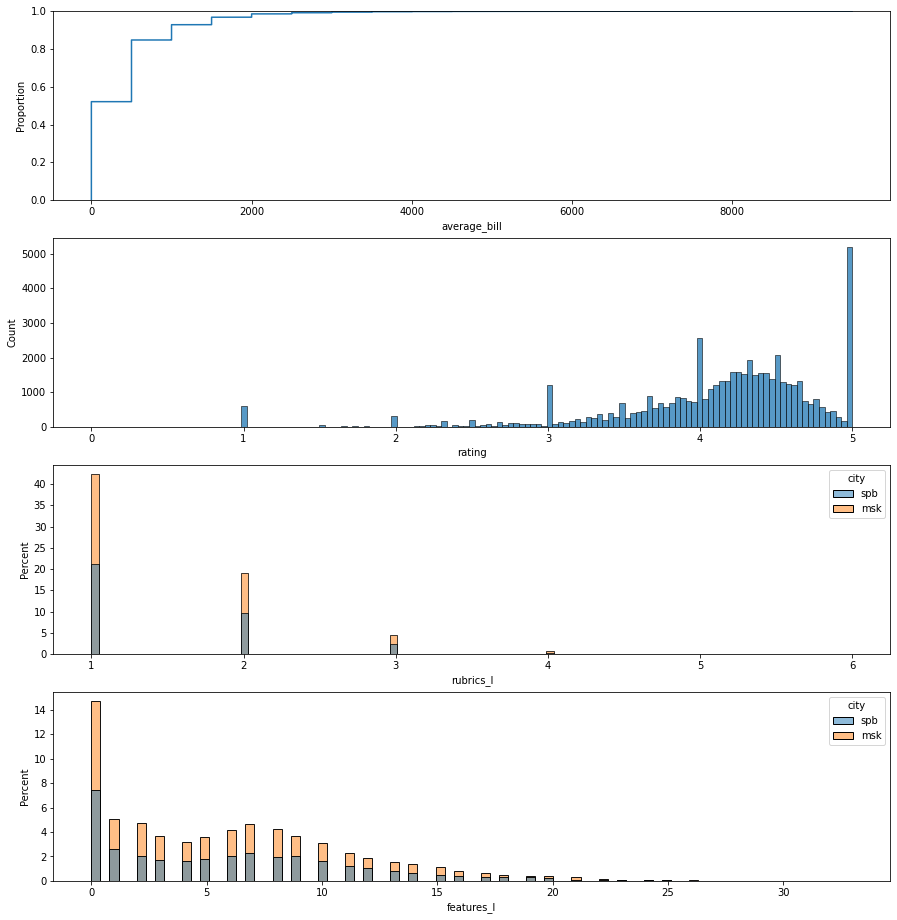

In [25]:
display(orgs_df.describe())
fig, axs = plt.subplots(nrows=4 ,figsize = (15,16))
sns.ecdfplot(data=orgs_df[orgs_df.average_bill<10000], x='average_bill',ax=axs[0])
sns.histplot(data=orgs_df, x='rating', ax=axs[1])
sns.histplot(data=orgs_df, x='rubrics_l', ax=axs[2], hue='city', stat='percent')
sns.histplot(data=orgs_df, x='features_l', ax=axs[3], hue='city', stat='percent')

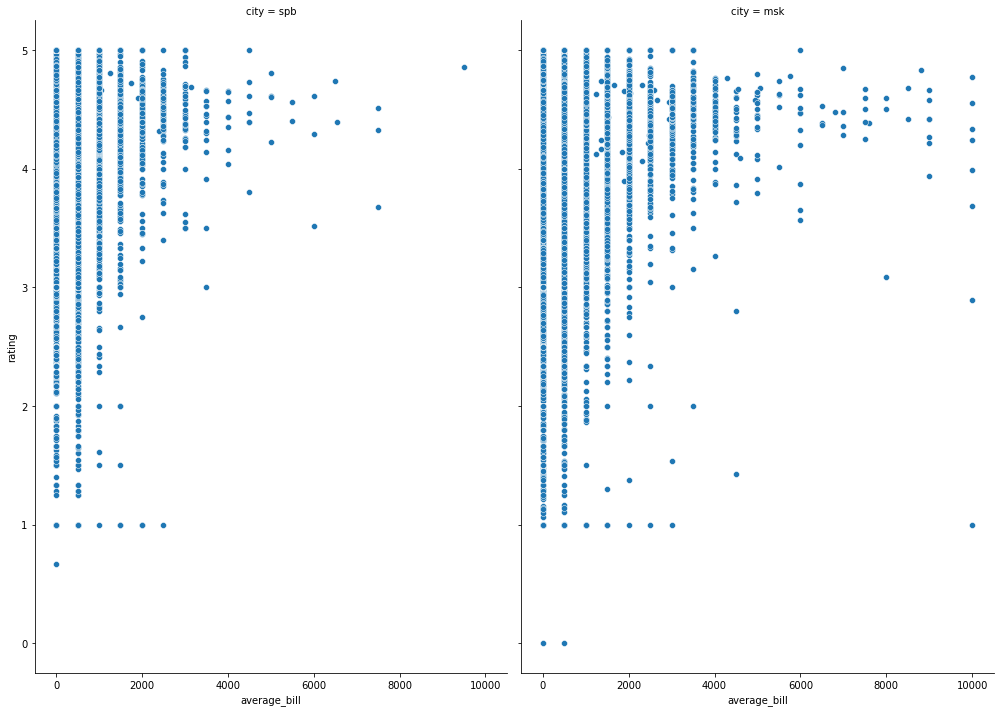

In [37]:
g = sns.FacetGrid(orgs_df, col="city",height=10, aspect=.7)
g.map(sns.scatterplot, "average_bill","rating")

In [38]:
aspects = load_aspects()
rubrics = load_rubrics(orgs_df=orgs_df)
features = load_features(orgs_df=orgs_df)
test_users = pd.read_csv('test_users.csv', dtype=str)

In [129]:
display(rubrics)
display(features)

,rubric_id,rubric_name,count,count_normed
3,30774,Кафе,26003,0.391582
5,30776,Ресторан,21796,0.328228
2,30771,Быстрое питание,10866,0.163632
11,31495,Кофейня,8601,0.129523
1,30770,"Бар, паб",7268,0.109450
0,30519,"Булочная, пекарня",5215,0.078533
8,31350,Кондитерская,4619,0.069558
6,30777,Столовая,2891,0.043536
4,30775,Пиццерия,2883,0.043415
10,31401,Кальян-бар,2676,0.040298


,feature_id,feature_name,count,count_normed
31,20422,payment_by_credit_card,39927,0.601265
7,1018,food_delivery,38722,0.583119
24,11704,wi_fi,37249,0.560937
34,273469383,coffee_to_go,31269,0.470883
28,11867,business_lunch,29800,0.448761
...,...,...,...,...
45,3501539205,vinotheque,115,0.001732
6,790,pets,114,0.001717
10,10447,kalyan,110,0.001657
42,3501480642,has_bar,102,0.001536


In [40]:
reviews = load_reviews(users_df=users_df, orgs_df=orgs_df)

In [41]:
reviews.head()

,user_id,org_id,rating,ts,aspects,aspects_l,user_city,org_city,travel
0,16998268288908323644,7184895086928047809,2.0,105,[],0,msk,msk,0
1,3121447338909258868,7184895086928047809,5.0,464,[],0,msk,msk,0
2,1970649778250883025,7184895086928047809,3.0,789,[],0,msk,msk,0
3,7554889464530643866,7184895086928047809,4.0,936,[],0,msk,msk,0
4,15907910894057053620,7184895086928047809,1.0,1143,[],0,msk,msk,0


In [58]:
review_stats = reviews.groupby(['user_id','user_city']).aggregate({'rating':[np.mean, 'count'], 'aspects_l':np.mean}).reset_index()
review_stats.columns=['user_id','user_city','mean_rating','n_ratings','mean_aspects']

<AxesSubplot:xlabel='mean_aspects', ylabel='Proportion'>

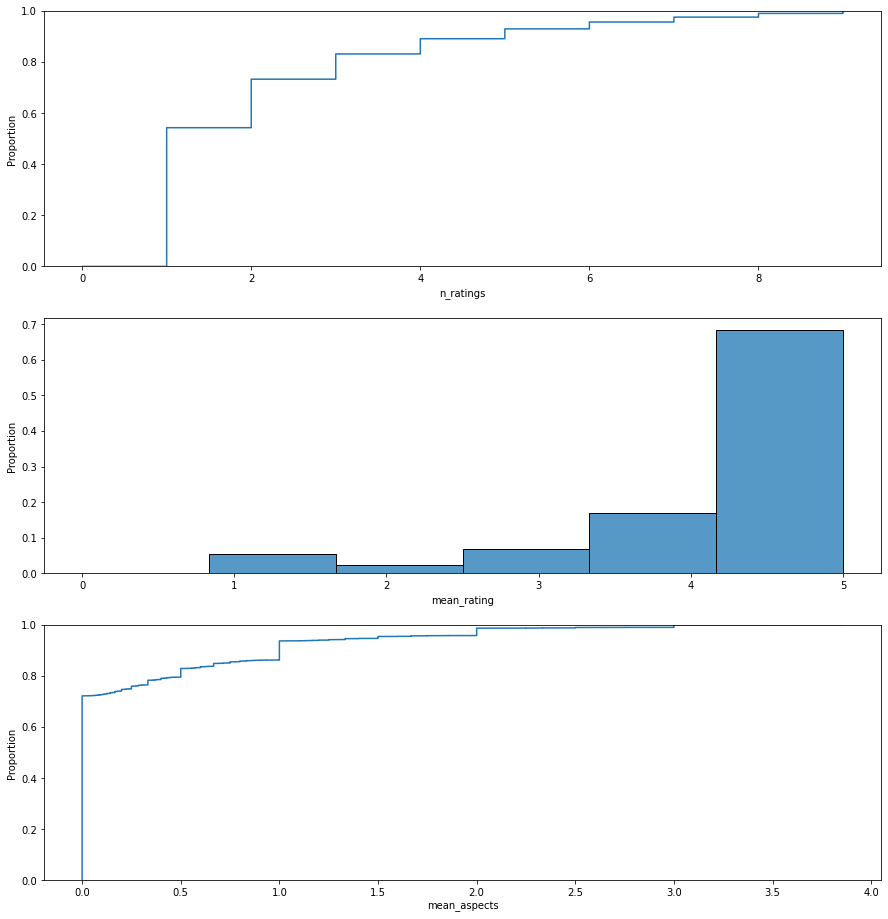

In [51]:
fig, axs = plt.subplots(nrows=3 ,figsize = (15,16))
sns.ecdfplot(data=review_stats[review_stats.n_ratings<10], x='n_ratings', stat='proportion', ax=axs[0])
sns.histplot(data=review_stats, x='mean_rating', stat='proportion', ax=axs[1], bins=6)
sns.ecdfplot(data=review_stats[review_stats.mean_aspects<4], x='mean_aspects', stat='proportion', ax=axs[2])

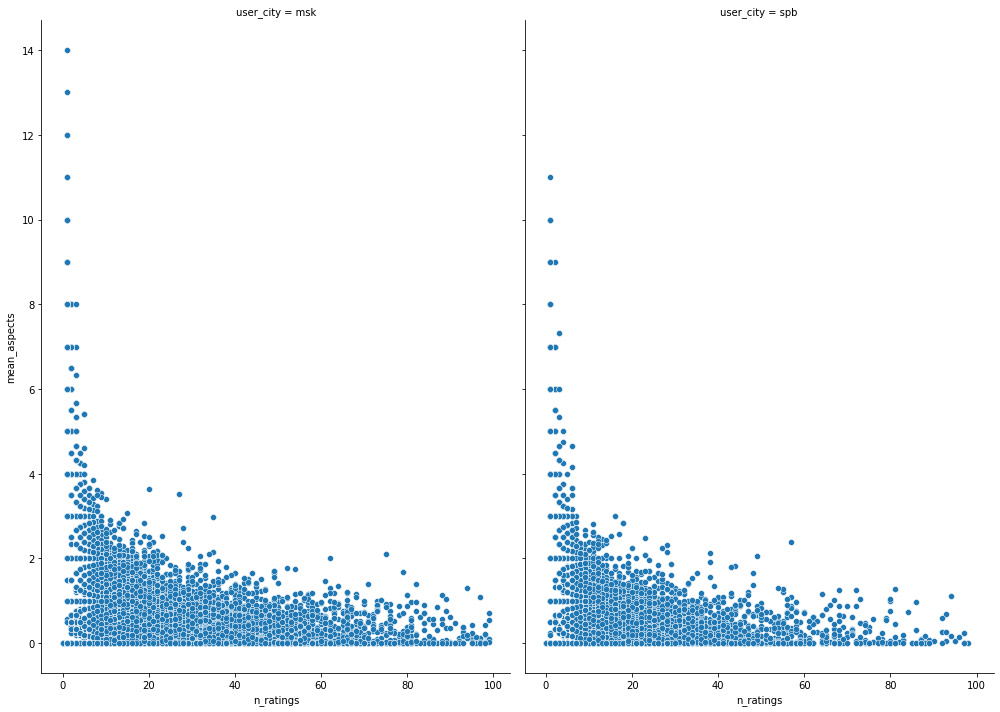

In [63]:
g = sns.FacetGrid(review_stats[review_stats.n_ratings<100], col="user_city",height=10, aspect=.7)
g.map(sns.scatterplot, 'n_ratings','mean_aspects')

In [168]:
reviews['in_test'] = reviews['user_id'].isin(set(test_users['user_id'])).astype(int)

<AxesSubplot:xlabel='travel', ylabel='Percent'>

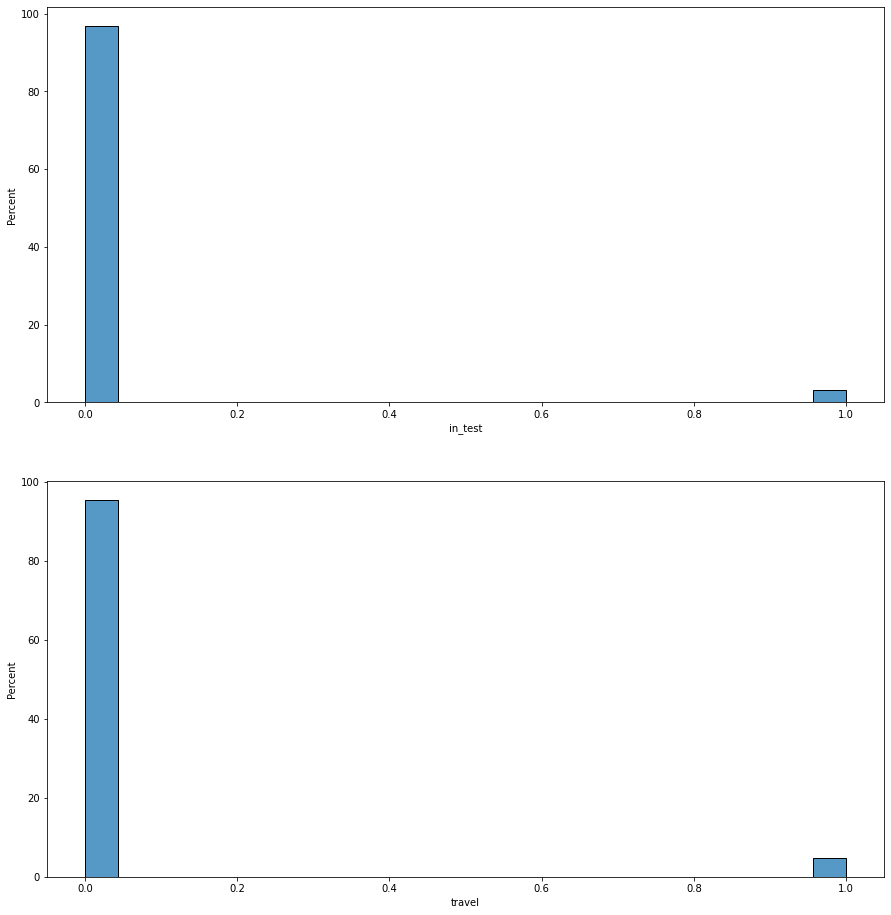

In [174]:
fig, axs = plt.subplots(nrows=2 ,figsize = (15,16))
sns.histplot(data=reviews, x='in_test', stat='percent', ax=axs[0])
sns.histplot(data=reviews, x='travel', stat='percent', ax=axs[1])

<AxesSubplot:xlabel='rating', ylabel='Percent'>

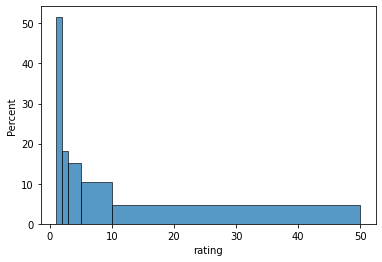

In [150]:
sns.histplot(count_stat, x='rating', bins=[1,2,3,5,10,50], stat='percent')